<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Costumer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.shape

(10000, 14)

In [7]:

df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]>

**Data Analysis : **

In [9]:

df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

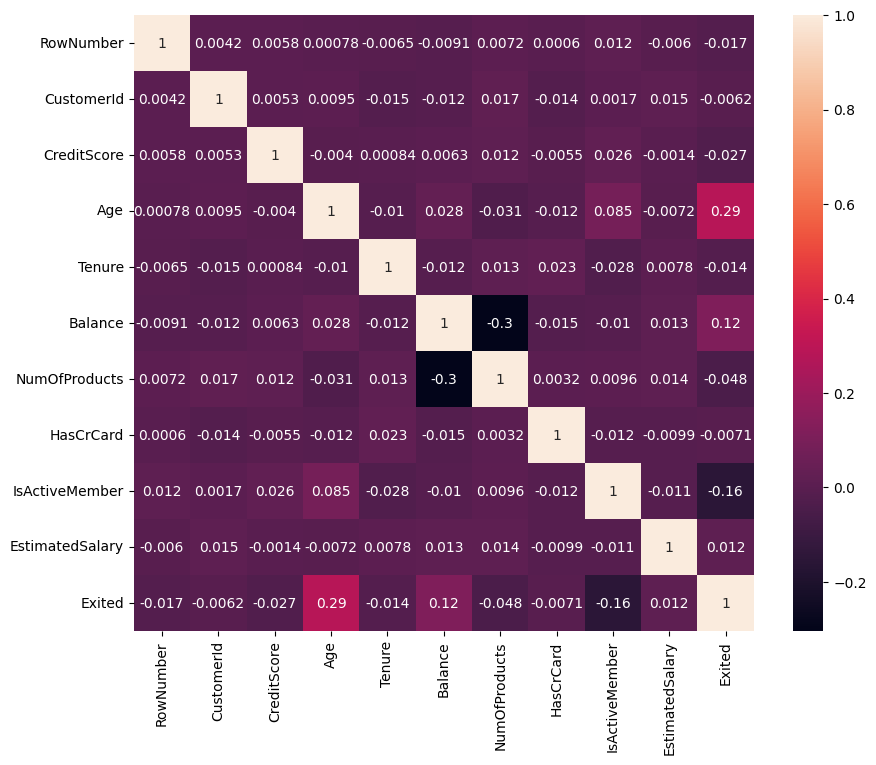

In [12]:

# Compute the correlation matrix for the numeric columns
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()


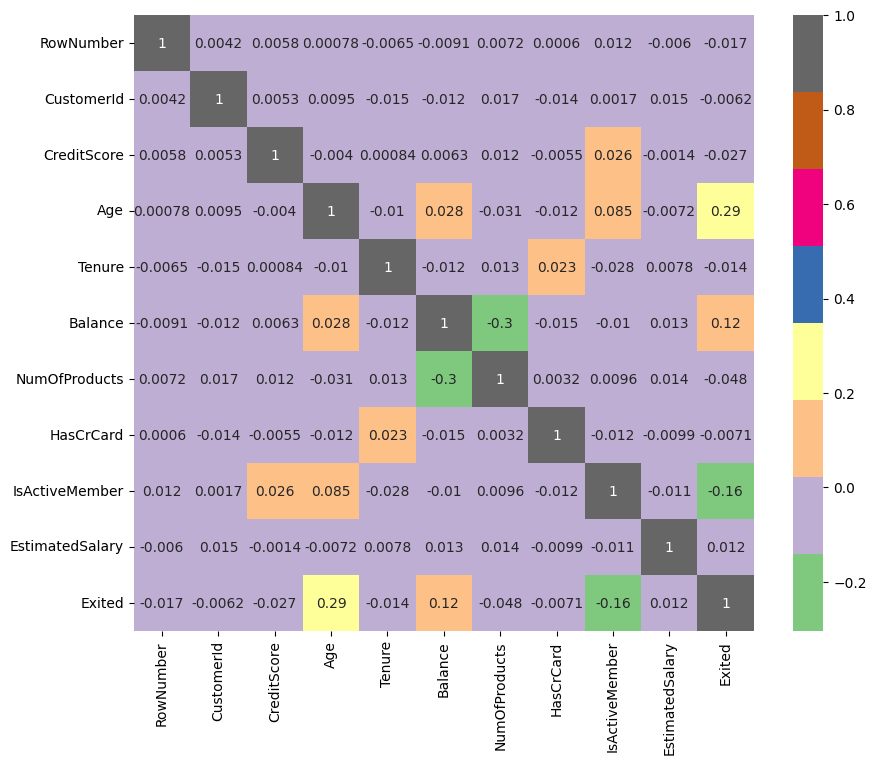

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap = 'Accent')
plt.show()


In [14]:
corr

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

In [15]:
corr['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [16]:
features = corr['Exited'].sort_values(ascending = False)[1:]

In [17]:
features.index, features.values

(Index(['Age', 'Balance', 'EstimatedSalary', 'CustomerId', 'HasCrCard',
        'Tenure', 'RowNumber', 'CreditScore', 'NumOfProducts',
        'IsActiveMember'],
       dtype='object'),
 array([ 0.28532304,  0.11853277,  0.01209686, -0.00624799, -0.00713777,
        -0.01400061, -0.01657137, -0.02709354, -0.04781986, -0.15612828]))

<ipython-input-18-b9dc2c0c358f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = features.index, y = features.values, palette='Set2')


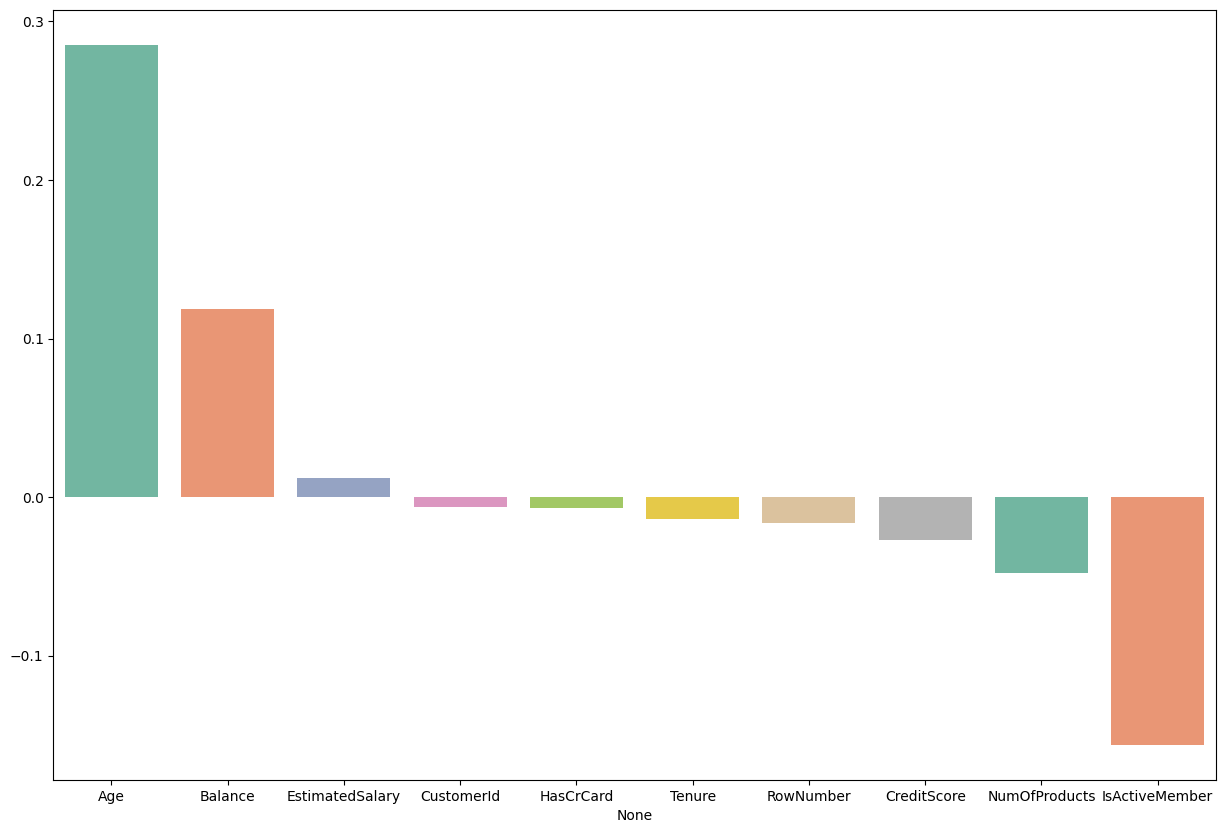

In [18]:
plt.figure(figsize = (15,10))
sns.barplot(x = features.index, y = features.values, palette='Set2')
plt.show()

**Data Visualization : **

In [19]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [20]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Exited
0    7963
1    2037
Name: count, dtype: int64


<ipython-input-21-ab8ad9fed532>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Exited', data = df, palette='Set2' )


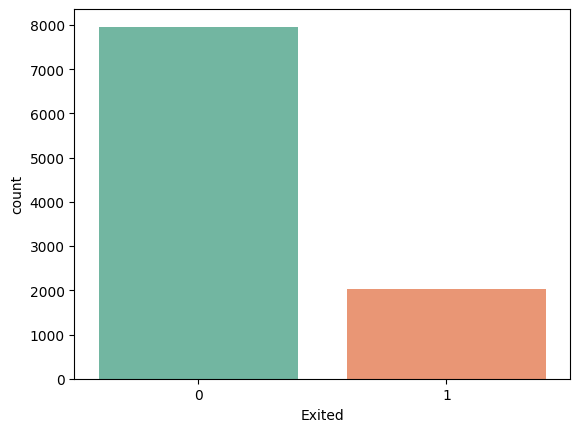

In [21]:
print(df['Exited'].value_counts())

sns.countplot(x= 'Exited', data = df, palette='Set2' )
plt.show()

Gender
Male      5457
Female    4543
Name: count, dtype: int64


<ipython-input-22-1ed79cb01d4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Gender', data = df, palette='Set2' )


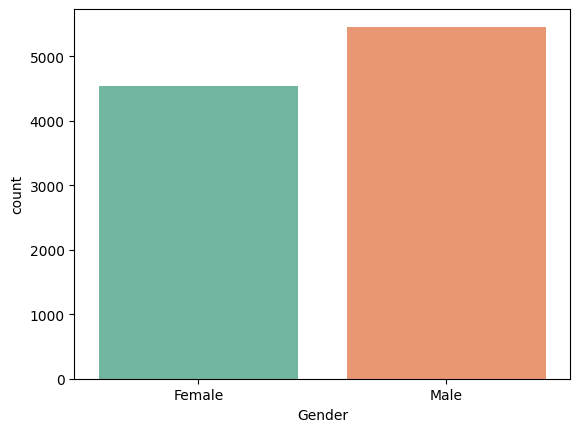

In [22]:
print(df['Gender'].value_counts())


sns.countplot(x= 'Gender', data = df, palette='Set2' )
plt.show()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


<ipython-input-25-040bf24e9356>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Tenure', data = df, palette='Set2')


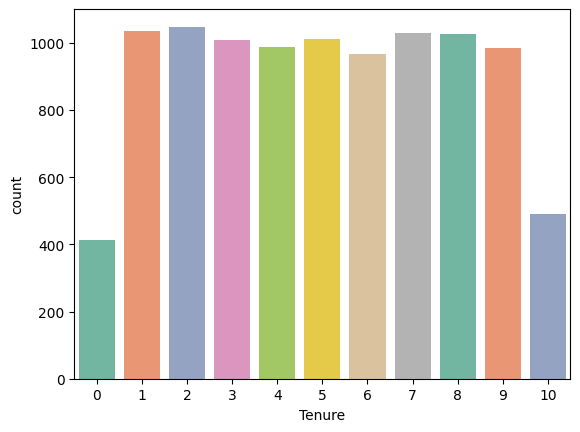

In [25]:
print(df['Tenure'].value_counts())

sns.countplot(x= 'Tenure', data = df, palette='Set2')
plt.show()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


<ipython-input-26-936155b93170>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'NumOfProducts', data = df, palette='Set2')


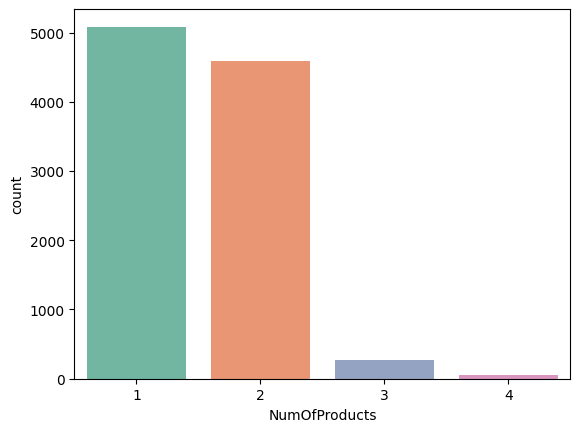

In [26]:
print(df['NumOfProducts'].value_counts())

sns.countplot(x= 'NumOfProducts', data = df, palette='Set2')
plt.show()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64


<ipython-input-27-f1dc3654c995>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'HasCrCard', data = df, palette='Set2')


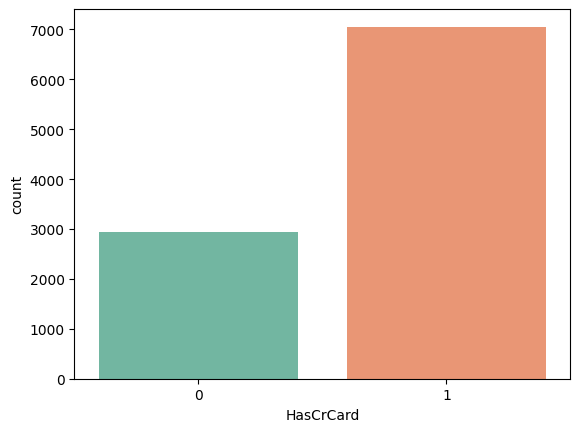

In [27]:
print(df['HasCrCard'].value_counts())

sns.countplot(x= 'HasCrCard', data = df, palette='Set2')
plt.show()

**Finding Relations : **

<Figure size 2500x1500 with 0 Axes>

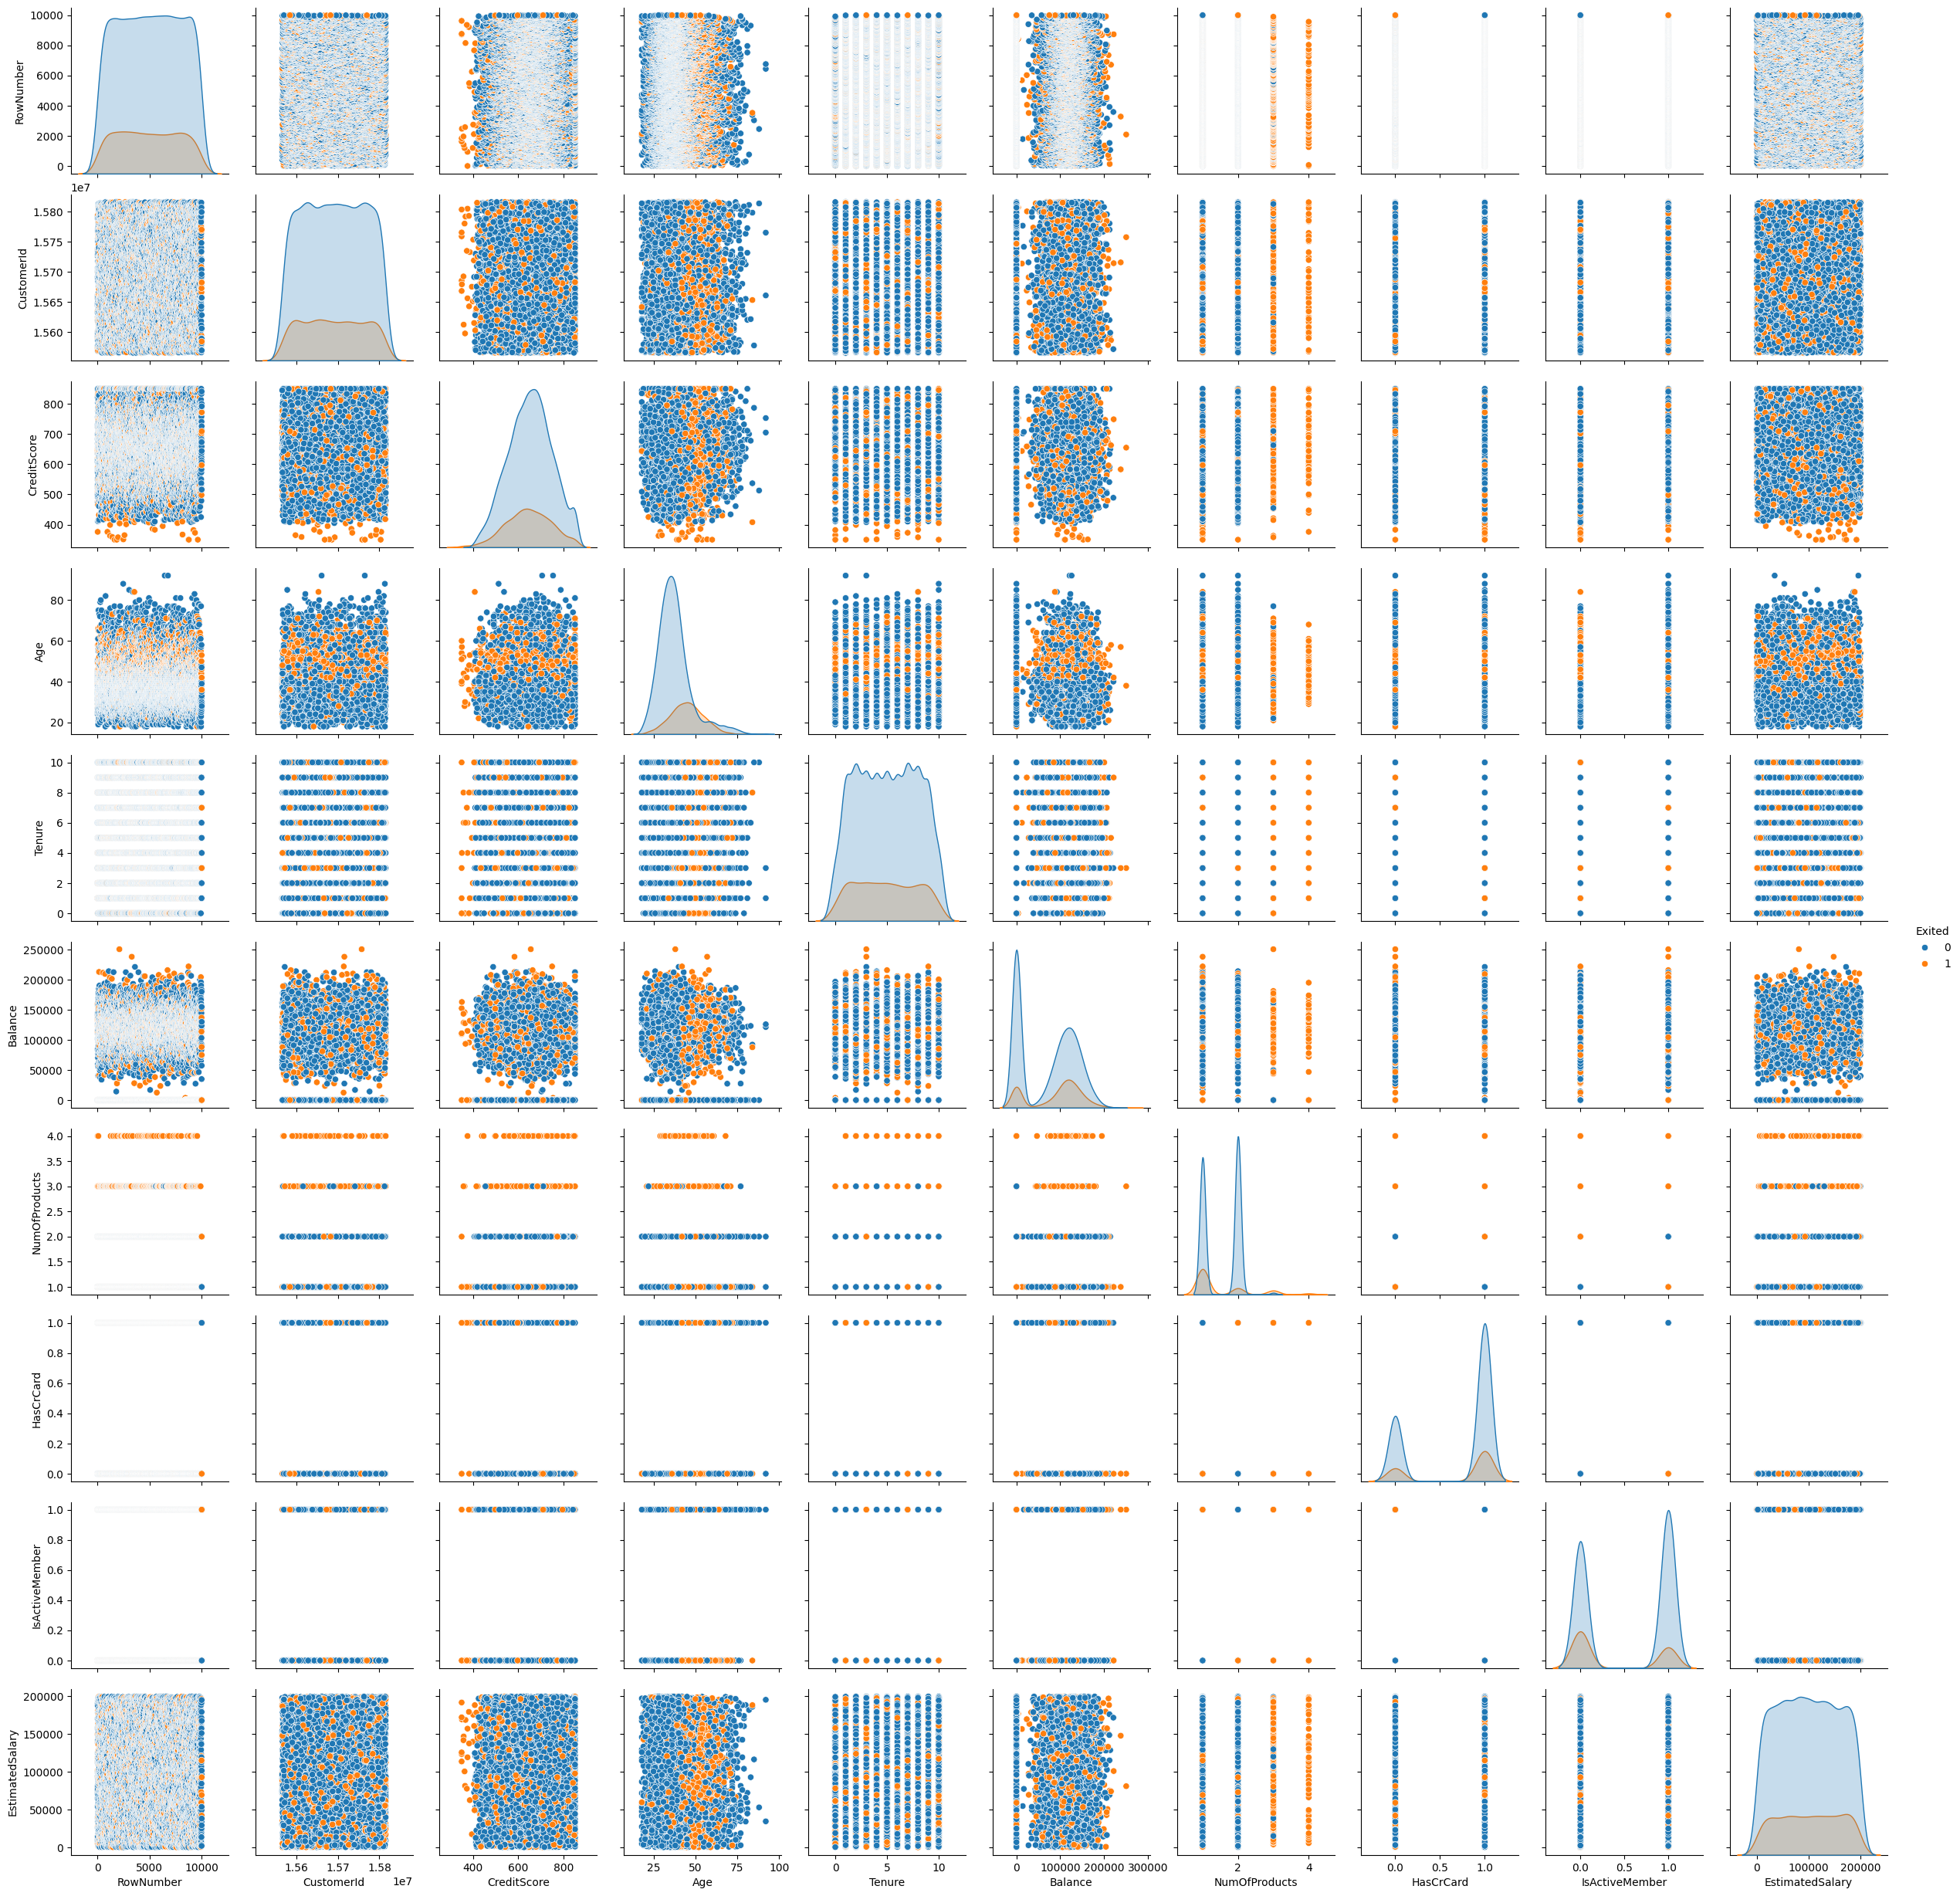

In [28]:
plt.figure(figsize = (25,15))
sns.pairplot(df, hue = 'Exited')
plt.show()

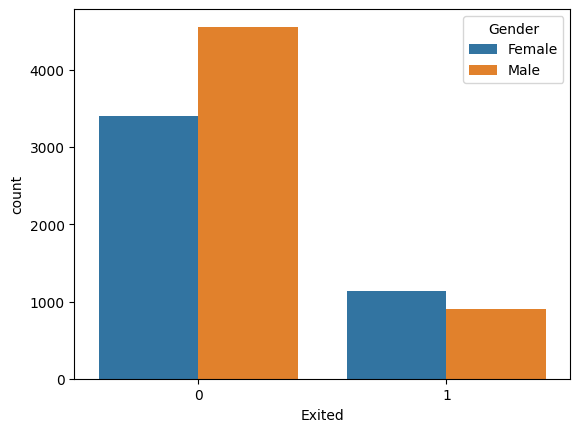

In [70]:
sns.countplot(x = 'Exited', data = df, hue = 'Gender')
plt.show()

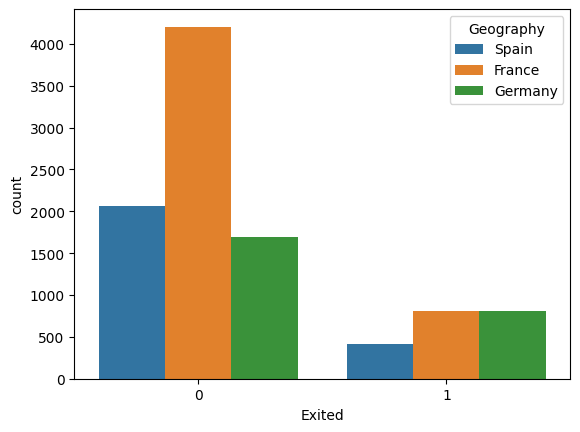

In [72]:
sns.countplot(x = 'Exited', data = df, hue = 'Geography')
plt.show()

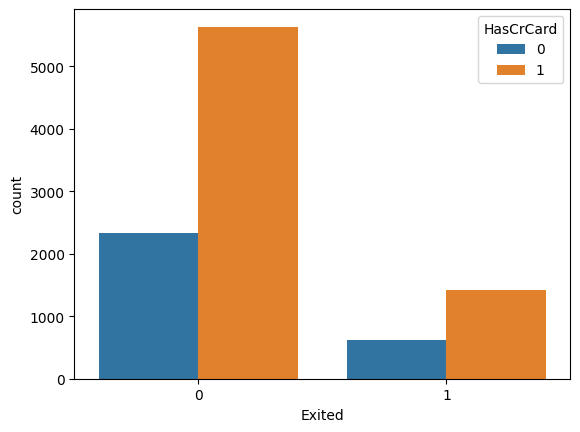

In [73]:
sns.countplot(x = 'Exited', data = df, hue = 'HasCrCard')
plt.show()

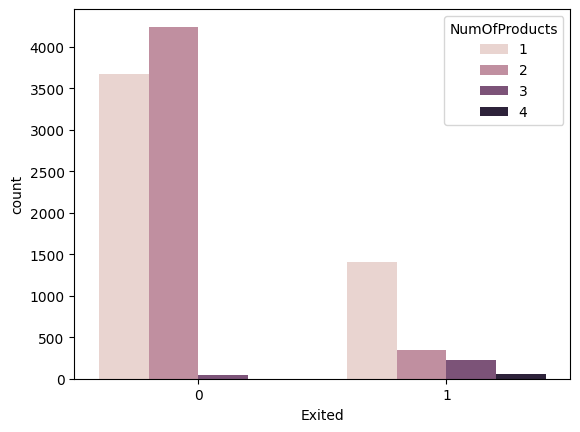

In [74]:

sns.countplot(x = 'Exited', data = df, hue = 'NumOfProducts')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


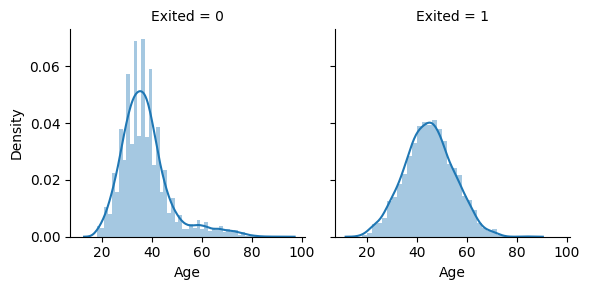

In [79]:
sns.FacetGrid(df, col = 'Exited')\
    .map(sns.distplot, 'Age')
plt.show()

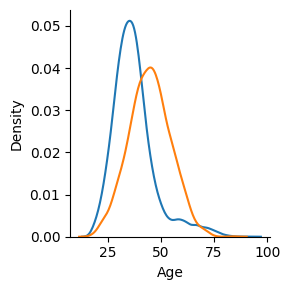

In [80]:
sns.FacetGrid(df, hue = 'Exited')\
    .map(sns.kdeplot, 'Age')
plt.show()

**Data Preprocessing :**

In [81]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [82]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [83]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [89]:
df['Geography'] = df['Geography'].astype('category').cat.codes
# df['Gendr'] = df['Gender'].astype('category').cat.codes  // This won't work for Gender :
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})  #

# One More way : np.where(df['Gender'] == 'Male', 1, 0)

In [90]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gendr  
0          1               1        101348.88       1      0  
1          0               1        112542.58       0      0  
2          1               0        113931.57       1      0  
3          0               0         93826.63       0      0  
4          1               1         79084.10       0      0

In [91]:
 X = df.drop('Exited', axis = 1)
y = df['Exited']

In [92]:
X

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Gendr  
0             1               1        101348.88      0  
1             0               1        112542.58      0  
2             1               0        113931.57      0  
3             0               0         93826.63      0  
4             1               1         79084.10      0  
...         ...             ...              ...    ...  
9995          1               0         96270.64      1  
9996          1               1        101699.77      1  
9997          0               1         42085.58      0  
9998          1               0         92888.52      1  
9999          1               0         38190.78      0  

[10000 rows x 11 columns]

In [93]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [94]:
 X = df.drop('Exited', axis = 1).values
y = df['Exited'].values

In [95]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0134888e+05, 0.0000000e+00],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.1254258e+05, 0.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1393157e+05, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        4.2085580e+04, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        9.2888520e+04, 1.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.8190780e+04, 0.0000000e+00]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

**Model Building : **

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [110]:
from xgboost import XGBClassifier

In [111]:
basic_model = XGBClassifier()
basic_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
def evaluate_model(model):
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Testing Accuracy:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)

    print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
    print("Classification Report:", classification_report(y_test, y_pred))
    print("F1_Score:", f1_score(y_test, y_pred))


In [117]:
evaluate_model(basic_model)

Training Accuracy: 0.9611940298507463
Testing Accuracy: 0.8503030303030303
Confusion Matrix: [[2451  166]
 [ 328  355]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2617
           1       0.68      0.52      0.59       683

    accuracy                           0.85      3300
   macro avg       0.78      0.73      0.75      3300
weighted avg       0.84      0.85      0.84      3300

F1_Score: 0.5897009966777409


**Hyperparameter Tunning : To increase the F1_score **

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
Xgb_param = {
    'n_estimators' : [100, 200],
     'max_depth' : [4, 5]
}

In [122]:
grid = GridSearchCV(XGBClassifier(), param_grid = Xgb_param, cv = 10, scoring = 'accuracy')

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [126]:
print("Best Score : ", grid.best_score_)

Best Score :  0.8555223880597014


In [127]:
print("Best Params : ", grid.best_params_)

Best Params :  {'max_depth': 4, 'n_estimators': 100}


In [129]:
model_1 = XGBClassifier(max_depth = 4)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
evaluate_model(model_1)

Training Accuracy: 0.9092537313432836
Testing Accuracy: 0.8615151515151516
Confusion Matrix: [[2489  128]
 [ 329  354]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2617
           1       0.73      0.52      0.61       683

    accuracy                           0.86      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.85      0.86      0.85      3300

F1_Score: 0.607725321888412


**GBDT : **

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
model_2 = GradientBoostingClassifier(n_estimators = 500)
model_2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [138]:
evaluate_model(model_2)

Training Accuracy: 0.908955223880597
Testing Accuracy: 0.8624242424242424
Confusion Matrix: [[2494  123]
 [ 331  352]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2617
           1       0.74      0.52      0.61       683

    accuracy                           0.86      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.85      0.86      0.85      3300

F1_Score: 0.6079447322970639
